# Data augmentation

Data augmentation is the process of altering original data items in a structured way to produce similar data items that differ from the original data item in a precisely defined way. Data augmentation techniques can be applied to textual data, image data, and audio data. In this exercise we will focus on augmentation techniques for text and images.

In order to complete the exercise you need to install two libraries:

```bash
bash$ pip install nlpaug

bash$ pip install augmentor
```

## Augmentation of text

Data augmentation for text can be performed on three levels:
- character modifications
- word modifications
- sentence modifications

### Character-level augmentation

There are two primary reasons for doing character-level augmentation:
- to simulate typing errors
- to simulate OCR errors

Below we start with a simple example of augmentation that tries to address these two cases.

In [ ]:
from nlpaug.augmenter.char import KeyboardAug

_input = 'Poznan is a medium-sized city on the banks of the Warta river'
_output = KeyboardAug().augment(_input)

print(f"{_input}\n{_output}")

The `nlpaug` library allows to produce multiple augmentations for a single input, as well as processing a list of texts.

In [ ]:
_input = 'To be or not to be, this is the question'
_output = KeyboardAug().augment(_input, n=5)

print(f"{_input}")

for result in _output:
    print(f"{result}")

In [ ]:
_input = [
    'This is the first sentence',
    'This is the second sentence',
    'This is the third sentence',
]
_output = KeyboardAug().augment(_input)

for original, transformed in zip(_input, _output):
    print(f"{original}\n{transformed}\n")

If the training data for the ML model have been extracted via OCR from images, there is probably a very specific bias in the data. For instance, the lower case letter `l` can be easily mistaken for the digit `1` or for the upper case `I`. Similarly, `9` and `g` are often confused as well as `0` and `O`. `OCRAug` class simulates these types of mistakes.

In [ ]:
from nlpaug.augmenter.char import OcrAug

_input = 'This bottle has the volume of 10 l and it weights 230 g'
_output = OcrAug().augment(_input)

print(f"{_input}\n{_output}")

Finally, `nlpaug` allows to introduce random insertions, swaps, and deletions of characters from the source text.

In [ ]:
from nlpaug.augmenter.char import RandomCharAug

_input = 'Imagine all the people living life of peace'

_output_ins = RandomCharAug(action='insert').augment(_input)
_output_sub = RandomCharAug(action='substitute').augment(_input)
_output_swp = RandomCharAug(action='swap').augment(_input)
_output_del = RandomCharAug(action='delete').augment(_input)

print(f"{_input}")
print(f"{_output_ins}\n{_output_sub}\n{_output_swp}\n{_output_del}")

### Word-level augmentation

Word-level augmentation can be used in many scenarios depending on the characteristics of the training dataset. Examples of augmentations include:

- substituting a word for an alternative spelling
- finding a synonym of a word based on word embeddings
- finding a synonym of a word based on TF-IDF
- finding a synonym of a word based on contextual word embeddings
- finding a synonym of a word based on a dictionary
- randomly splitting words
- substituting a word for its antonym

Below we will see some of the above scenarios in action.

In [ ]:
from nlpaug.augmenter.word import SpellingAug

_input = 'In a hole in the ground there lived a hobbit'

_output = SpellingAug().augment(_input, n=3)

print(f"{_input}")

for result in _output:
    print(f"{result}")

The next example requires you to download the pre-trained word embeddings. We are using `fasttext` Englishl embeddings trained on the Wikipedia corpus. You can download the model from [https://fasttext.cc/docs/en/english-vectors.html](https://fasttext.cc/docs/en/english-vectors.html)

In [ ]:
from nlpaug.augmenter.word import WordEmbsAug

augmenter = WordEmbsAug(model_type='fasttext', 
                        model_path='wiki-news-300d-1M.vec',
                        action='substitute'
                       )

_input = 'In a hole in the ground there lived a hobbit'
_output = augmenter.augment(_input)

print(f"{_input}\n{_output}")

`FastText` or `word2vec` embeddings are static, a given word always receives the same vector, independent of the textual context. If you want to use contextual embeddings, you have to use the BERT family of language models (`bert-base-uncased`, `distilbert-base-uncased`, `roberta-base`, etc.)

In [ ]:
from nlpaug.augmenter.word import ContextualWordEmbsAug

augmenter = ContextualWordEmbsAug(model_path='bert-base-uncased', action='substitute')

_input = 'In a hole in the ground there lived a hobbit'
_output = augmenter.augment(_input)

print(f"{_input}\n{_output}")

Similar functionality can be achieved by using WordNet or PPDB. In order to run the following examples please do the following:

- install `nltk 3.5`
- download the paraphrase database file from http://paraphrase.org/#/download (use the small size pack)

```bash
bash$ pip install nltk==3.5
```

In [ ]:
from nlpaug.augmenter.word import SynonymAug

_input = 'Every cloud has a silver lining'
_output = SynonymAug(aug_src='wordnet').augment(_input)

print(f"{_input}\n{_output}")

If you plan to use PDDB database (http://paraphrase.org/#/) then you have to point to the location of the file.

In [ ]:
from nlpaug.augmenter.word import SynonymAug
import os

augmenter = SynonymAug(
    aug_src='ppdb',
    model_path='ppdb-2.0-s-all'
)

_input = 'Every cloud has a silver lining'
_output = augmenter.augment(_input)

print(f"{_input}\n{_output}")

An interesting option is to use antonyms for generating alternatives for the training data. Here is a simple example.

In [ ]:
from nlpaug.augmenter.word import AntonymAug

_input = 'I am having a great time!'
_output = AntonymAug().augment(_input)

print(f"{_input}\n{_output}")

Finally, `RandomWordAug` allows us to randomly swap, delete and crop words from the input.

In [ ]:
from nlpaug.augmenter.word import RandomWordAug

_input = 'Once upon a time there was a little bird'

_output_swp = RandomWordAug(action='swap').augment(_input)
_output_del = RandomWordAug(action='delete').augment(_input)
_output_crp = RandomWordAug(action='crop').augment(_input)

print(f"{_input}")
print(f"{_output_swp}\n{_output_del}\n{_output_crp}")

There is also a word-level augmenter which performs random splitting of words.

In [ ]:
from nlpaug.augmenter.word import SplitAug

_input = 'In a hole in the ground there lived a hobbit'
_output = SplitAug().augment(_input)

print(f"{_input}\n{_output}")

Finally, if you want to augment only specific words (for which you know precisely the alternatives), you can use the `ReservedAug`.

In [ ]:
from nlpaug.augmenter.word import ReservedAug

reserved_words = [
    ['FW', 'Fwd', 'F/D', 'Forward'],
    ['Q1', 'Q2', 'Q3', 'Q4']
]

_input = 'Fwd: Sales report for Q1'
_output = ReservedAug(reserved_tokens=reserved_words).augment(_input)

print(f"{_input}\n{_output}")

### Sentence-level augmentation

Sentence-level augmentation uses state-of-the-art contextual word embeddings created by the BERT family of language models. In order to use these models you have to install the following dependencies:

```bash
bash$ pip install torch>=1.6.0 transformers>=4.0.0
```

In [ ]:
from nlpaug.augmenter.sentence import ContextualWordEmbsForSentenceAug

augmenter = ContextualWordEmbsForSentenceAug(model_path='xlnet-base-cased' , temperature=0.5, top_k=50, min_length=200)

_input = 'To be or not to be, this is the question.'
_output = augmenter.augment(_input)

print(f"{_input}\n{_output}")

### Sequences of augmentations

`nlpaug` allows you to define two modes of sequential augmentations:
- provide a list of augmentations to be applied sequentially
- provide a list of augmentations which will randomly be applied

In [ ]:
from nlpaug.flow import Sequential, Sometimes
from nlpaug.util import Action
from nlpaug.augmenter.word import RandomWordAug
from nlpaug.augmenter.char import RandomCharAug

_flow = Sequential(
    [
    RandomCharAug(action=Action.INSERT),
    RandomCharAug(action=Action.SWAP),
    RandomWordAug(action=Action.DELETE),
    ]
)

_input = 'In a hole in the ground there lived a hobbit'
_output = _flow.augment(_input)

print(f"{_input}\n{_output}")

### Exercise

Use the [IMDB Dataset](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews) to create a sample of 100 movie reviews. Then, create a sequence of transformations that are relevant for training the sentiment model. Assume that the reviews have been manually typed on a keyboard. Include character-level, word-level and sentence-level augmentations. In particular, try to augment movie reviews with relevant synonyms. 

## Augmentation for images

We will experiment with `Augmentor` library to perform random augmentations of images. `Augmentor` allows you to define a _pipeline_ of augmentations. Each augmentation has a parameter `probability` which defines, how probable it is that the augmentation will be applied. 

For this part of the exercise we will use the [Face Mask Detection dataset](https://www.kaggle.com/sshikamaru/face-mask-detection) from Kaggle Datasets.

After downloading and unpacking the dataset, please create an additional directory with a single image for demonstration purposes.

```bash
bash$ mkdir images/example
bash$ cp images/train/smartmi-3pcs-filter-mask-pm25-haze-dustproof-mask-with-vent_jpg.rf.c5b0c5b7666032c5b4634740eafde234.jpg images/example/image.jpg
```

In [ ]:
import Augmentor

path_to_files = 'images/example/'

p = Augmentor.Pipeline(path_to_files)
p.status()

We will start with a very simple horizontal mirror flip of images

In [ ]:
p.flip_left_right(probability=0.9)

p.sample(5)

In [ ]:
from IPython.display import Image, display, HTML

from glob import glob

def make_html(image):
     return f"<img src='{image}' style='display:inline;margin:1px;width:100px'/>"
    
original_image = "images/example/image.jpg"
transformed_images = glob("images/example/output/*.jpg")

display(Image(filename=original_image, width=100, height=100))

html_images = ''.join([make_html(x) for x in transformed_images])
display(HTML(html_images))    

Next, we will illustrate some more transformations available in the `Augmentor` library

In [ ]:
!rm images/example/output/*

In [ ]:
# rotation

path_to_files = 'images/example'

p = Augmentor.Pipeline(path_to_files)

p.rotate(probability=0.5, max_left_rotation=25, max_right_rotation=25)
# p.rotate180(probability=0.5)
# p.rotate90(probability=0.5)
# p.rotate_random_90(probability=0.5)

p.sample(10)

original_image = 'images/example/image.jpg'
transformed_images = glob('images/example/output/*.jpg')

display(Image(filename=original_image, width=100, height=100))

html_images = ''.join([make_html(x) for x in transformed_images])
display(HTML(html_images))

In [ ]:
!rm images/example/output/*

In [ ]:
# zooming

path_to_files = 'images/example'

p = Augmentor.Pipeline(path_to_files)

p.zoom(probability=0.5, min_factor=1.1, max_factor=2.0)
# p.zoom_random(probability=0.5, percentage_area=0.5)

p.sample(10)

original_image = 'images/example/image.jpg'
transformed_images = glob('images/example/output/*.jpg')

display(Image(filename=original_image, width=100, height=100))

html_images = ''.join([make_html(x) for x in transformed_images])
display(HTML(html_images))

In [ ]:
!rm images/example/output/*

In [ ]:
# perspective skewing

path_to_files = 'images/example'

p = Augmentor.Pipeline(path_to_files)

p.skew_tilt(probability=0.5)
# p.skew_left_right(probability=0.5)
# p.skew_top_bottom(probability=0.5)
# p.skew_corner(probability=0.5)

p.sample(10)

original_image = 'images/example/image.jpg'
transformed_images = glob('images/example/output/*.jpg')

display(Image(filename=original_image, width=100, height=100))

html_images = ''.join([make_html(x) for x in transformed_images])
display(HTML(html_images))

In [ ]:
!rm images/example/output/*

In [ ]:
# elastic distortions

path_to_files = 'images/example'

p = Augmentor.Pipeline(path_to_files)

p.random_distortion(probability=0.9, grid_width=5, grid_height=5, magnitude=10)
# p.random_color(probability=0.5, min_factor=0.1, max_factor=0.5)
# p.random_contrast(probability=0.5, min_factor=0.1, max_factor=0.5)
# p.random_erasing(probability=0.5, rectangle_area=0.25)
# p.random_brightness(probability=0.5, min_factor=0.1, max_factor=0.5)

p.sample(10)

original_image = 'images/example/image.jpg'
transformed_images = glob('images/example/output/*.jpg')

display(Image(filename=original_image, width=100, height=100))

html_images = ''.join([make_html(x) for x in transformed_images])
display(HTML(html_images))

In [ ]:
!rm images/example/output/*

In [ ]:
# shearing

path_to_files = 'images/example'

p = Augmentor.Pipeline(path_to_files)

p.shear(probability=0.5, max_shear_left=25, max_shear_right=25)

p.sample(10)

original_image = 'images/example/image.jpg'
transformed_images = glob('images/example/output/*.jpg')

display(Image(filename=original_image, width=100, height=100))

html_images = ''.join([make_html(x) for x in transformed_images])
display(HTML(html_images))

In [ ]:
!rm images/example/output/*

In [ ]:
# cropping

path_to_files = 'images/example'

p = Augmentor.Pipeline(path_to_files)

p.crop_centre(probability=0.5, percentage_area=0.5)
# p.crop_by_size(probability=0.5, width=100, height=100)
# p.crop_random(probability=0.5, percentage_area=0.5)

p.sample(10)

original_image = 'images/example/image.jpg'
transformed_images = glob('images/example/output/*.jpg')

display(Image(filename=original_image, width=100, height=100))

html_images = ''.join([make_html(x) for x in transformed_images])
display(HTML(html_images))

If you wish to process each image in the pipeline exactly once, use `process()`

In [ ]:
!rm images/example/output/*

In [ ]:
# resizing

def make_html_original_size(image):
     return f"<img src='{image}' style='display:inline;margin:1px'/>"
    
path_to_files = 'images/example'

p = Augmentor.Pipeline(path_to_files)

p.resize(probability=1.0, width=100, height=100)

p.process()

original_image = 'images/example/image.jpg'
transformed_images = glob('images/example/output/*.jpg')

display(Image(filename=original_image))

html_images = ''.join([make_html_original_size(x) for x in transformed_images])
display(HTML(html_images))

### Exercise

Use the `images/train` folder to create a set of transformations of images. When designing the augmentation pipeline, consider the main aim of the augmentation: to improve the model for face mask detection.

## Augmentation for imbalanced datasets

One situation where augmentation is very helpful is the classification of highly imbalanced datasets. In order to increase the number of instances in the under-represented class we can augment the data by oversampling. Synthetic Minority Oversampling Technique (SMOTE) is a very popular approach to such augmentation.

Before proceeding to examples, make sure you have `imbalanced-learn` library installed:

```bash
$bash pip install imblearn
```

We will begin by generating a synthetic imbalanced dataset.

In [5]:
from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, n_samples=2000, weights=[0.95, 0.05], class_sep=1)

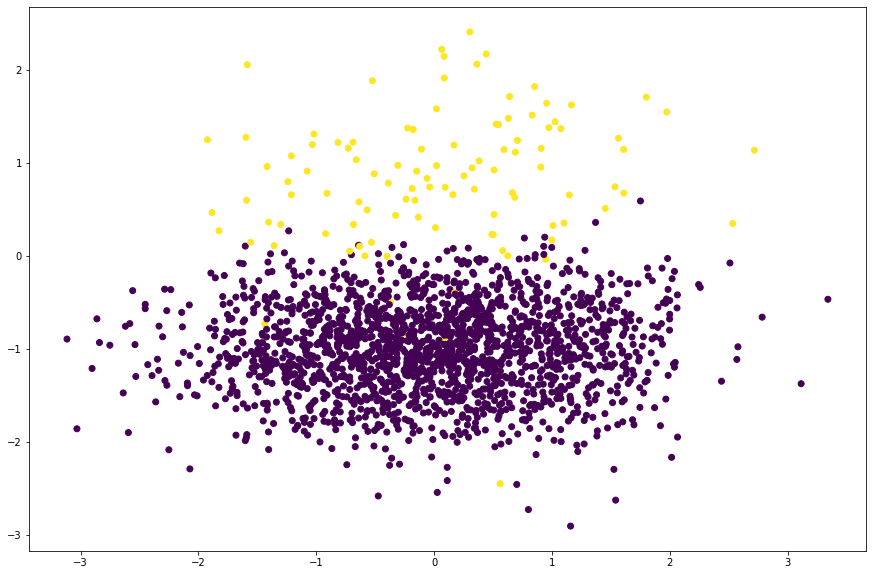

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], c=y)

The idea of SMOTE is to find all k-nearest neighbors of each minority class point, and to generate synthetic points laying half-way between each pair of points.

In [7]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=1.0, k_neighbors=3)
X_smote, y_smote = smote.fit_resample(X, y)

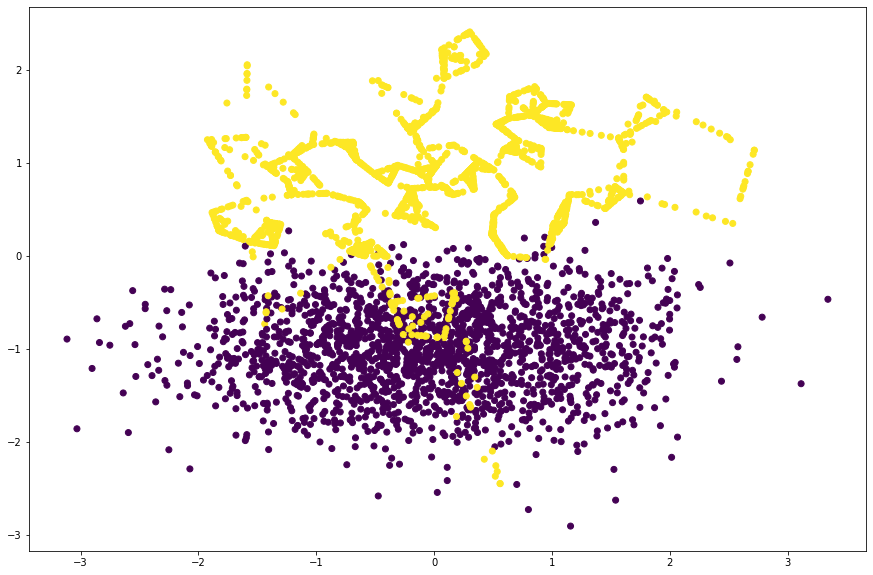

In [8]:
plt.figure(figsize=(15,10))
plt.scatter(X_smote[:, 0], X_smote[:, 1], c=y_smote)

SMOTE creates synthetic datapoints between all examples of the minority class. A variation of the method, called Borderline-SMOTE, generates the synthetic examples only along the decision boundary between the classes

In [9]:
from imblearn.over_sampling import BorderlineSMOTE

bsmote = BorderlineSMOTE(sampling_strategy=0.5, k_neighbors=3, m_neighbors=10)
X_bsmote, y_bsmote = bsmote.fit_resample(X, y)

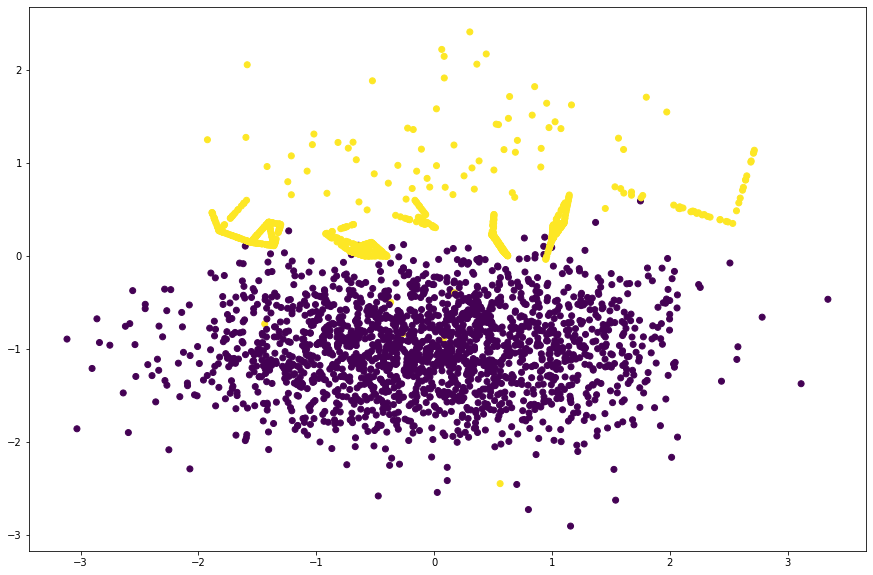

In [10]:
plt.figure(figsize=(15,10))
plt.scatter(X_bsmote[:, 0], X_bsmote[:, 1], c=y_bsmote)

Finally, Adaptive Syntheic (AdaSyn) method verifies if a minority class point lies close to majority class points and generates synthetic examples in these areas to increase the local density of the minority class

In [11]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(sampling_strategy=0.25, n_neighbors=3)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

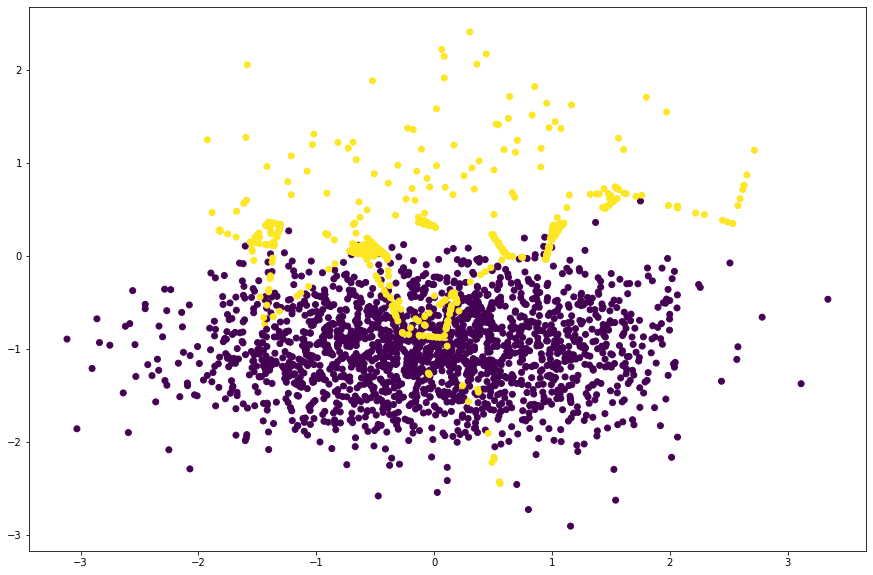

In [12]:
plt.figure(figsize=(15,10))
plt.scatter(X_adasyn[:, 0], X_adasyn[:, 1], c=y_adasyn)

### Exercise

Load the Iris dataset from `sklearn.datasets` and remove 90% of the *virginica* flowers. Use SMOTE or Borderline-SMOTE to re-generate examples of virginica. Visualize your results

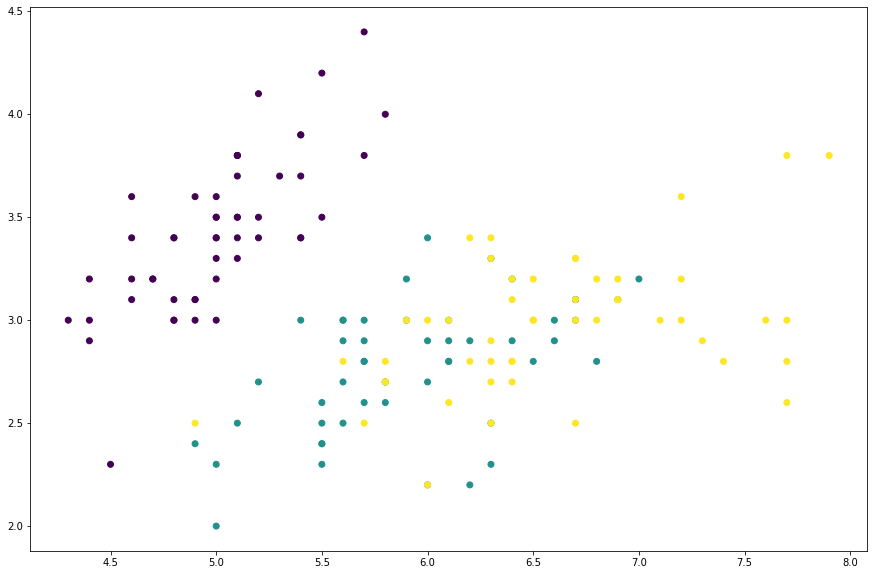

In [22]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris["data"]
y = iris["target"]

plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:,1], c=y)